In [ ]:
# === Prerequisites (run once) ===
# !pip install yfinance pandas numpy seaborn plotly matplotlib


import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import time

# === Configuration ===
FTSE100_SAMPLE_TICKERS = [
    "LMP.L", "IHG.L", "PRU.L", "CTEC.L", "HSX.L", "SDR.L", "LLOY.L", "SGE.L",
    "SGRO.L", "BARC.L", "AZN.L", "SMT.L", "AV.L", "PSH.L", "BAB.L", "ICG.L",
    "AAL.L", "RTO.L", "WEIR.L", "ITRK.L", "CPG.L", "PSN.L", "ABF.L", "UTG.L",
    "CCEP.L", "III.L", "WTB.L", "ANTO.L", "GSK.L", "REL.L", "WPP.L", "MNG.L",
    "KGF.L", "LGEN.L", "BEZ.L", "DCC.L", "SMIN.L", "SN.L", "IAG.L", "AUTO.L",
    "SSE.L", "NXT.L", "CCH.L", "RKT.L", "TSCO.L", "STAN.L", "BT-A.L", "GAW.L",
    "SVT.L", "BNZL.L", "ADM.L", "INF.L", "PHNX.L", "IMI.L", "RIO.L", "BKG.L",
    "DGE.L", "DPLM.L", "MKS.L", "BA.L", "PSON.L", "MRO.L", "ULVR.L", "BATS.L",
    "HLN.L", "MNDI.L", "AAF.L", "LSEG.L", "EDV.L", "CRDA.L", "VOD.L", "UU.L",
    "IMB.L", "FRES.L", "NG.L", "SHEL.L", "CNA.L", "STJ.L", "BP.L", "HSBA.L",
    "ENT.L", "HIK.L", "FCIT.L", "AHT.L", "BTRW.L", "JD.L", "HLMA.L", "SPX.L",
    "RR.L", "EXPN.L", "GLEN.L", "EZJ.L", "RMV.L", "SBRY.L", "ALW.L", "TW.L",
    "HWDN.L", "NWG.L", "PCT.L", "LAND.L"
]

def fetch_ftse100_stock_data(tickers=100, period='5y', interval='1d', min_data_points=60, sleep_between=0.2):
    """
    Fetch historical price data for FTSE100 tickers from Yahoo Finance.
    Returns a dict: { ticker: DataFrame of history } filtered for sufficient data.
    """
    if tickers is None:
        tickers = FTSE100_SAMPLE_TICKERS

    stock_data = {}
    success = 0
    print(f"Fetching data for {len(tickers)} tickers from Yahoo Finance...")

    for i, ticker in enumerate(tickers, 1):
        try:
            print(f"[{i}/{len(tickers)}] Downloading {ticker}...", end=' ')
            yf_ticker = yf.Ticker(ticker)
            hist = yf_ticker.history(period=period, interval=interval, auto_adjust=True, actions=False)

            if hist is None or hist.empty or len(hist) < min_data_points:
                print(f"SKIPPED (insufficient data: {0 if hist is None else len(hist)} rows)")
                continue

            # Basic cleanup: ensure datetime index is sorted and timezone-naive
            hist = hist.sort_index()
            if hasattr(hist.index, 'tz'):
                hist.index = hist.index.tz_localize(None)
            stock_data[ticker] = hist
            success += 1
            print("OK")

        except Exception as e:
            print(f"ERROR ({e})")
        time.sleep(sleep_between)  # polite throttle to avoid hitting rate limits

    print(f"Finished. Successfully fetched {success} / {len(tickers)} tickers with sufficient data.")
    return stock_data

def fetch_benchmark_ftse(period='5y', interval='1d'):
    """
    Fetch benchmark FTSE 100 index (^FTSE) from Yahoo Finance.
    """
    try:
        bench = yf.Ticker('^FTSE')
        hist = bench.history(period=period, interval=interval, auto_adjust=True, actions=False)
        if hist is None or hist.empty:
            raise ValueError("Empty benchmark data")
        hist = hist.sort_index()
        if hasattr(hist.index, 'tz'):
            hist.index = hist.index.tz_localize(None)
        print("Benchmark (^FTSE) fetched successfully.")
        return hist
    except Exception as e:
        print(f"Error downloading benchmark: {e}")
        return None

if __name__ == "__main__":
    # Step 1: Fetch stock price data (limit to first 20 for speed during testing)
    tickers_to_fetch = FTSE100_SAMPLE_TICKERS[:100]
    stock_data = fetch_ftse100_stock_data(tickers=tickers_to_fetch, period='5y', interval='1d')

    # Inspect one ticker
    sample = list(stock_data.keys())[0]
    print(f"\nSample data for {sample}:")
    print(stock_data[sample].tail())

    # Step 2: Fetch benchmark
    benchmark = fetch_benchmark_ftse(period='5y', interval='1d')
    if benchmark is not None:
        print("\nBenchmark sample:")
        print(benchmark[['Close']].tail())

Fetching data for 100 tickers from Yahoo Finance...
[1/100] Downloading LMP.L... OK
[2/100] Downloading IHG.L... OK
[3/100] Downloading PRU.L... OK
[4/100] Downloading CTEC.L... OK
[5/100] Downloading HSX.L... OK
[6/100] Downloading SDR.L... OK
[7/100] Downloading LLOY.L... OK
[8/100] Downloading SGE.L... OK
[9/100] Downloading SGRO.L... OK
[10/100] Downloading BARC.L... OK
[11/100] Downloading AZN.L... OK
[12/100] Downloading SMT.L... OK
[13/100] Downloading AV.L... OK
[14/100] Downloading PSH.L... OK
[15/100] Downloading BAB.L... OK
[16/100] Downloading ICG.L... OK
[17/100] Downloading AAL.L... OK
[18/100] Downloading RTO.L... OK
[19/100] Downloading WEIR.L... OK
[20/100] Downloading ITRK.L... OK
[21/100] Downloading CPG.L... OK
[22/100] Downloading PSN.L... OK
[23/100] Downloading ABF.L... OK
[24/100] Downloading UTG.L... OK
[25/100] Downloading CCEP.L... OK
[26/100] Downloading III.L... OK
[27/100] Downloading WTB.L... OK
[28/100] Downloading ANTO.L... OK
[29/100] Downloading GSK.L


Benchmark Sharpe: 0.671

=== STEP 1: Compute indicators and signals ===


Tickers: 100%|██████████| 100/100 [00:01<00:00, 61.38it/s]


Computed signals for 100 tickers.

=== STEP 2: Build sticky daily top-N portfolios ===
RSI Only: final cumulative return 63.91%, avg exposure 9.60, turnover 12.5%
MACD Only: final cumulative return 62.82%, avg exposure 9.83, turnover 10.4%
RSI+MA Strict: final cumulative return 12.19%, avg exposure 8.39, turnover 5.3%
Blended: final cumulative return 100.10%, avg exposure 10.00, turnover 115.9%

=== STEP 3: Strategy summaries (with regression) ===

--- RSI Only ---
Sharpe                   : 0.5801500796673001
Alpha(ann%)              : 8.95014736271345
Beta                     : 0.33459182975563334
R_squared                : 0.047085307381687036
p_alpha                  : 0.325167493484681
p_beta                   : 8.93074365050943e-15
Information Ratio        : 0.12871693372904686
Total Cumulative Return (%): 63.91181328960045
Max Drawdown (%)         : -17.412752357962475
Winning Days (%)         : 17.28
Avg Exposure             : 9.6032
Turnover (%)             : 12.46028568886855

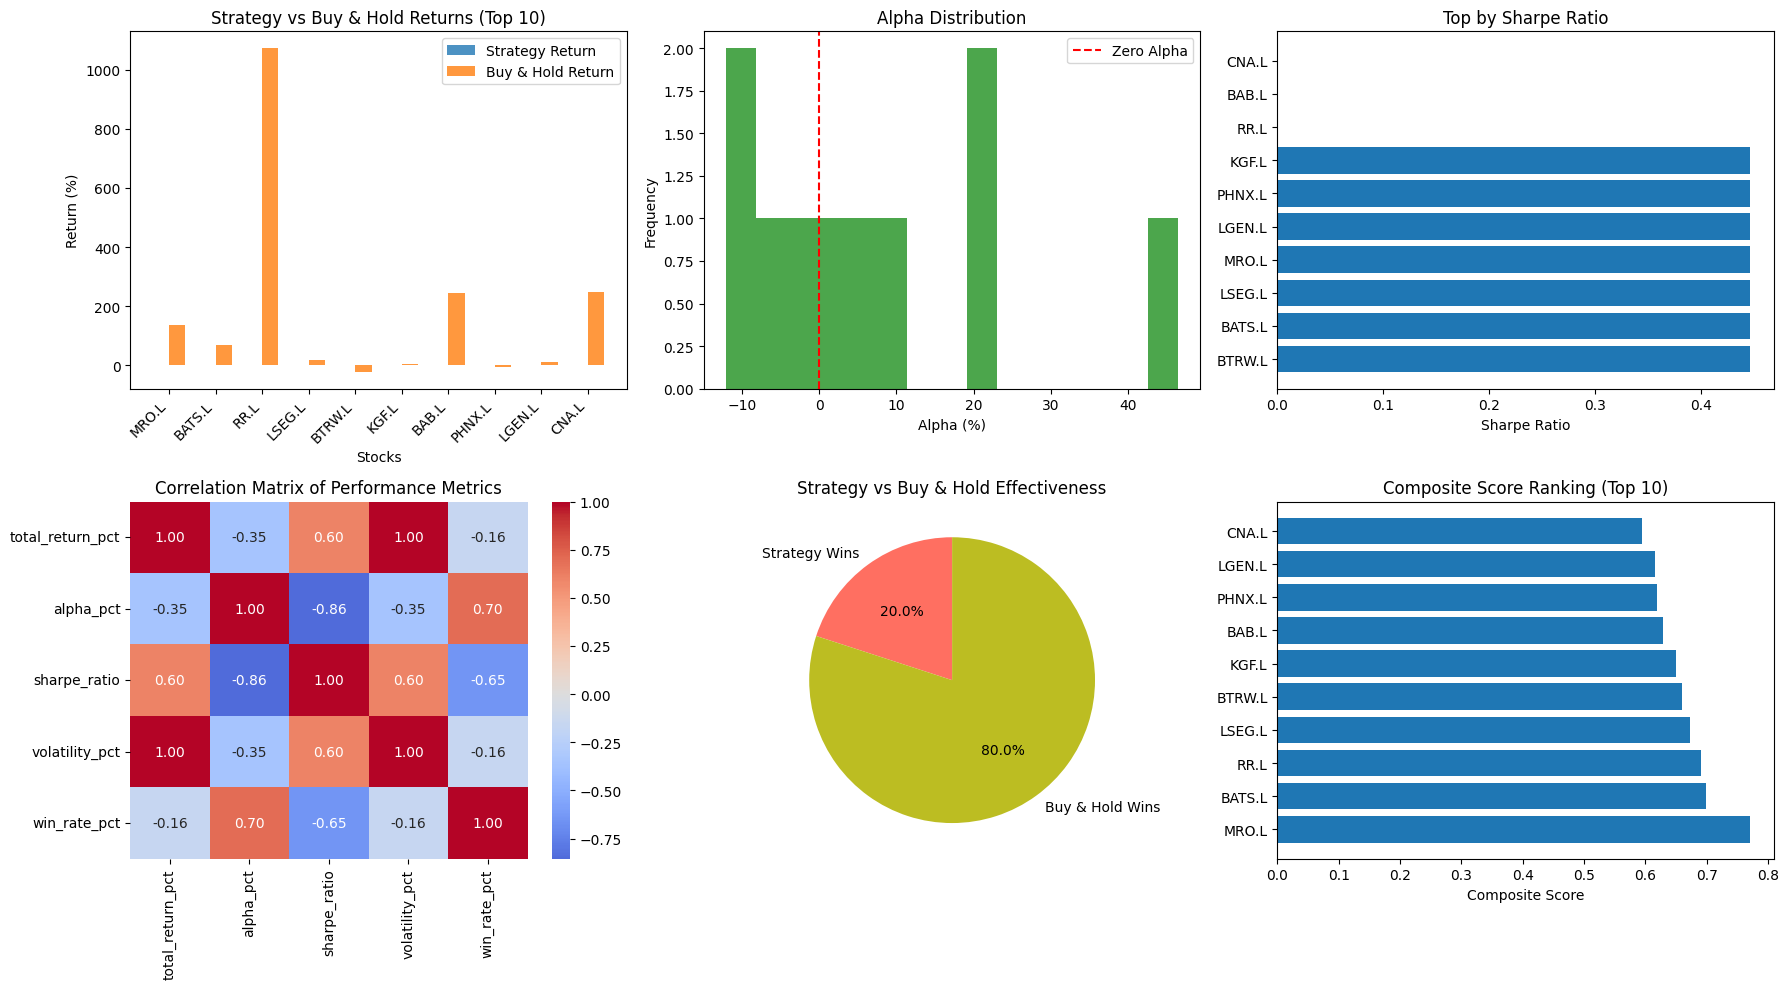

In [ ]:
# === dependencies ===
!pip install yfinance pandas numpy seaborn plotly matplotlib statsmodels mplcursors --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import statsmodels.api as sm
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import mplcursors 

# === CONFIGURABLE PARAMETERS ===
RSI_PARAMS = {
    "period": 10,
    "buy_thresh": 30,
    "sell_thresh": 70
}

MACD_PARAMS = {
    "fast": 8,
    "slow": 17,
    "signal": 9,
    "hist_strength": 0.0
}

MA_PARAMS = {
    "period": 30
}

BLEND_WEIGHTS = {
    "rsi": 0.4,
    "trend": 0.3,
    "macd": 0.3
}

VOL_WINDOW = 20  # lookback for volatility scaling

STICKY_PARAMS = {
    "top_n": 10,
    "slack": 0.85,
    "min_rank_return": 0.0
}

STABILITY_THRESHOLD = 85  # min observations to consider strategy stable

BLENDED_SIGNAL_THRESHOLD = 0.5  # sigmoid-bounded blended score threshold for discrete buy

# === Indicator computations ===
def calculate_rsi(prices, period=10):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(prices, fast=8, slow=17, signal=9):
    ema_fast = prices.ewm(span=fast, adjust=False).mean()
    ema_slow = prices.ewm(span=slow, adjust=False).mean()
    macd_line = ema_fast - ema_slow
    signal_line = macd_line.ewm(span=signal, adjust=False).mean()
    histogram = macd_line - signal_line
    return pd.DataFrame({'macd': macd_line, 'signal': signal_line, 'histogram': histogram})


def calculate_sma(prices, period=30):
    return prices.rolling(window=period).mean()

def calculate_volatility(prices, window=VOL_WINDOW):
    return prices.pct_change().rolling(window=window).std()

# === Signal generators ===
def rsi_signal(rsi_series, buy_thresh, sell_thresh):
    sig = pd.Series('hold', index=rsi_series.index)
    buy = (rsi_series.shift(1) < buy_thresh) & (rsi_series >= buy_thresh)
    sell = (rsi_series.shift(1) > sell_thresh) & (rsi_series <= sell_thresh)
    sig[buy] = 'buy'
    sig[sell] = 'sell'
    return sig

def macd_signal(macd_df, hist_strength_threshold=0.0):
    sig = pd.Series('hold', index=macd_df.index)
    macd = macd_df['macd']
    signal_line = macd_df['signal']
    histogram = macd - signal_line
    base_buy = (macd.shift(1) <= signal_line.shift(1)) & (macd > signal_line)
    base_sell = (macd.shift(1) >= signal_line.shift(1)) & (macd < signal_line)
    if hist_strength_threshold > 0:
        buy = base_buy & (histogram > hist_strength_threshold)
        sell = base_sell & (histogram < -hist_strength_threshold)
    else:
        buy = base_buy
        sell = base_sell
    sig[buy] = 'buy'
    sig[sell] = 'sell'
    return sig

def strategy_strict_rsi_ma(rsi_sig, prices, ma_series):
    sig = pd.Series('hold', index=rsi_sig.index)
    buy = (rsi_sig == 'buy') & (prices >= ma_series)
    sig[buy] = 'buy'
    return sig

def compute_blended_score(rsi_raw, prices, ma_series, macd_df, rsi_params, blend_weights):
    rsi_trigger = (((rsi_raw.shift(1) < rsi_params['buy_thresh']) & (rsi_raw >= rsi_params['buy_thresh'])).astype(float))
    trend_gap = (prices / ma_series - 1).clip(lower=0)
    histogram = macd_df['macd'] - macd_df['signal']
    price_vol = prices.pct_change().rolling(VOL_WINDOW).std()
    macd_strength = (histogram / (price_vol + 1e-6)).clip(lower=0)

    def robust_scale(series):
        med = series.rolling(63, min_periods=1).median()
        mad = (series - med).abs().rolling(63, min_periods=1).median()
        return (series - med) / (mad + 1e-6)

    trend_norm = robust_scale(trend_gap)
    macd_norm = robust_scale(macd_strength)
    trend_score = 1 / (1 + np.exp(-trend_norm))
    macd_score = 1 / (1 + np.exp(-macd_norm))

    blended = (blend_weights['rsi'] * rsi_trigger +
               blend_weights['trend'] * trend_score +
               blend_weights['macd'] * macd_score)
    return blended

# === Regression & statistics ===
def regression_alpha_beta(portfolio_returns, benchmark_returns):
    aligned = pd.DataFrame({'portfolio': portfolio_returns, 'benchmark': benchmark_returns}).dropna()
    if len(aligned) < 20:
        return {'alpha': 0.0, 'beta': 0.0, 'r_squared': np.nan,
                't_alpha': np.nan, 'p_alpha': np.nan, 't_beta': np.nan, 'p_beta': np.nan,
                'model': None}
    Y = aligned['portfolio']
    X = sm.add_constant(aligned['benchmark'])
    model = sm.OLS(Y, X).fit()
    alpha = model.params['const']
    beta = model.params['benchmark']
    alpha_ann = alpha * 252
    return {
        'alpha': alpha_ann,
        'beta': beta,
        'r_squared': model.rsquared,
        't_alpha': model.tvalues['const'],
        'p_alpha': model.pvalues['const'],
        't_beta': model.tvalues['benchmark'],
        'p_beta': model.pvalues['benchmark'],
        'model': model
    }

def sharpe_ratio(daily_returns):
    mean_ann = daily_returns.mean() * 252
    vol_ann = daily_returns.std() * np.sqrt(252)
    return mean_ann / vol_ann if vol_ann > 0 else 0.0

def information_ratio(portfolio_returns, benchmark_returns):
    aligned = pd.DataFrame({'portfolio': portfolio_returns, 'benchmark': benchmark_returns}).dropna()
    if aligned.empty:
        return 0.0
    excess = aligned['portfolio'] - aligned['benchmark']
    mean_excess_ann = excess.mean() * 252
    vol_excess_ann = excess.std() * np.sqrt(252)
    return mean_excess_ann / vol_excess_ann if vol_excess_ann > 0 else 0.0

def bootstrap_sharpe_diff(r1, r2, n_boot=2000, seed=42):
    np.random.seed(seed)
    min_len = min(len(r1), len(r2))
    r1 = r1[-min_len:].dropna()
    r2 = r2[-min_len:].dropna()
    if len(r1) < 20 or len(r2) < 20:
        return {'sharpe_diff': np.nan, 'p_value': np.nan, 'distribution': None}
    obs_diff = sharpe_ratio(r1) - sharpe_ratio(r2)
    diffs = []
    for _ in range(n_boot):
        idx = np.random.randint(0, min_len, size=min_len)
        sample1 = pd.Series(r1.values[idx])
        sample2 = pd.Series(r2.values[idx])
        diffs.append(sharpe_ratio(sample1) - sharpe_ratio(sample2))
    diffs = np.array(diffs)
    pval = np.mean(np.abs(diffs) >= abs(obs_diff))
    return {'sharpe_diff': obs_diff, 'p_value': pval, 'distribution': diffs}

def bootstrap_alpha_diff_regression(r1, r2, benchmark_returns, n_boot=2000, seed=42):
    np.random.seed(seed)
    min_len = min(len(r1), len(r2))
    r1 = r1[-min_len:].dropna()
    r2 = r2[-min_len:].dropna()
    bench = benchmark_returns.reindex(r1.index).dropna()
    if len(r1) < 20 or len(r2) < 20 or len(bench) < len(r1):
        return {'alpha_diff': np.nan, 'p_value': np.nan, 'distribution': None}
    alpha1 = regression_alpha_beta(r1, bench)['alpha']
    alpha2 = regression_alpha_beta(r2, bench)['alpha']
    obs_diff = alpha1 - alpha2
    diffs = []
    for _ in range(n_boot):
        idx = np.random.randint(0, min_len, size=min_len)
        samp1 = pd.Series(r1.values[idx])
        samp2 = pd.Series(r2.values[idx])
        bench_sample = pd.Series(bench.values[idx])
        a1 = regression_alpha_beta(samp1, bench_sample)['alpha']
        a2 = regression_alpha_beta(samp2, bench_sample)['alpha']
        diffs.append(a1 - a2)
    diffs = np.array(diffs)
    pval = np.mean(np.abs(diffs) >= abs(obs_diff))
    return {'alpha_diff': obs_diff, 'p_value': pval, 'distribution': diffs}

def compute_turnover(constituents_history):
    if len(constituents_history) < 2:
        return 0.0
    turnovers = []
    for prev, curr in zip(constituents_history[:-1], constituents_history[1:]):
        if not prev:
            continue
        sym_diff = prev.symmetric_difference(curr)
        turnovers.append(len(sym_diff) / len(prev))
    return np.mean(turnovers) if turnovers else 0.0

# === Simple per-ticker strategy simulator ===
def simulate_strategy(prices, signal_series, hold_period=1):
    prices = prices.sort_index()
    signal_series = signal_series.reindex(prices.index).fillna('hold')
    daily_returns = pd.Series(0.0, index=prices.index)
    trades = []
    in_position = False
    entry_price = None
    exit_idx = None
    for i in range(len(prices) - 1):
        date = prices.index[i]
        next_date = prices.index[i + 1]
        sig = signal_series.loc[date]
        if sig == 'buy' and not in_position:
            entry_price = prices.loc[next_date]
            in_position = True
            exit_idx = min(i + 1 + hold_period, len(prices) - 1)
        if in_position:
            # record daily return
            prev_price = prices.iloc[i] if i > 0 else entry_price
            curr_price = prices.iloc[i]
            if prev_price != 0:
                daily_returns.iloc[i] = (curr_price - prev_price) / prev_price
            # exit
            if i == exit_idx:
                exit_price = prices.iloc[i]
                ret = (exit_price - entry_price) / entry_price if entry_price != 0 else 0.0
                trades.append(ret)
                in_position = False
                entry_price = None
                exit_idx = None

    if in_position and entry_price is not None:
        final_price = prices.iloc[-1]
        ret = (final_price - entry_price) / entry_price if entry_price != 0 else 0.0
        trades.append(ret)
        if len(prices) >= 2 and prices.iloc[-2] != 0:
            daily_returns.iloc[-1] = (prices.iloc[-1] - prices.iloc[-2]) / prices.iloc[-2]

    total_return = (1 + daily_returns).prod() - 1
    vol = daily_returns.std() * np.sqrt(252) if daily_returns.std() > 0 else 0.0
    sharpe = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252)) if daily_returns.std() > 0 else 0.0
    win_rate = np.mean([1 if t > 0 else 0 for t in trades]) if trades else 0.0
    num_trades = len(trades)
    bh_return = (prices.iloc[-1] / prices.iloc[0]) - 1 if len(prices) >= 2 else 0.0
    strategy_beats = 1.0 if total_return > bh_return else 0.0

    return {
        'daily_returns': daily_returns,
        'total_return': total_return,
        'volatility': vol,
        'sharpe_ratio': sharpe,
        'win_rate': win_rate,
        'num_trades': num_trades,
        'strategy_beats_buy_hold': strategy_beats,
        'buy_hold_return': bh_return
    }

# === Portfolio builder ===
def build_daily_top_n_portfolio_sticky(indicator_store, signal_key, top_n=10, slack=0.8, min_rank_return=0.0):
    all_dates = sorted({d for v in indicator_store.values() for d in v['price'].index})
    daily_returns, exposures, constituents_history = [], [], []
    prev_constituents = set()
    prev_ranks = {}
    dates = []

    for i in range(2, len(all_dates)):
        signal_date = all_dates[i - 1]
        exec_date = all_dates[i]
        candidates = {}

        for ticker, data in indicator_store.items():
            prices = data['price']
            sig_series = data.get(signal_key)
            vol_series = data.get('volatility')
            if (signal_date not in prices.index) or (exec_date not in prices.index):
                continue

            use_rank = None
            if pd.api.types.is_numeric_dtype(sig_series.dtype):
                score = sig_series.get(signal_date, 0.0)
                if score <= min_rank_return:
                    continue
                use_rank = score
            else:
                if sig_series.get(signal_date, 'hold') != 'buy':
                    continue
                prev_idx = prices.index.get_indexer([signal_date], method='nearest')[0]
                if prev_idx == 0:
                    continue
                prev_price = prices.iloc[prev_idx - 1]
                signal_price = prices.loc[signal_date]
                if prev_price == 0 or signal_price == 0:
                    continue
                rank_return = (signal_price - prev_price) / prev_price
                if rank_return < min_rank_return:
                    continue
                use_rank = rank_return

            signal_price = prices.loc[signal_date]
            exec_price = prices.loc[exec_date]
            if signal_price == 0:
                continue
            exec_return = (exec_price - signal_price) / signal_price
            vol = vol_series.get(signal_date, np.nan) if vol_series is not None else np.nan
            candidates[ticker] = {'rank': use_rank, 'exec': exec_return, 'vol': vol}

        if not candidates and not prev_constituents:
            continue

        sorted_by_rank = sorted(candidates.items(), key=lambda x: x[1]['rank'], reverse=True)
        top_candidates = dict(sorted_by_rank[:top_n])
        cutoff = min(v['rank'] for v in top_candidates.values()) if top_candidates else -np.inf

        final_constituents = set(top_candidates.keys())
        for t in prev_constituents:
            last_rank = prev_ranks.get(t)
            if last_rank is None:
                continue
            if last_rank >= slack * cutoff:
                final_constituents.add(t)

        ranked_list = []
        for t in final_constituents:
            if t in candidates:
                r = candidates[t]['rank']
            else:
                r = prev_ranks.get(t, 0)
            ranked_list.append((t, r))
        ranked_list = sorted(ranked_list, key=lambda x: x[1], reverse=True)[:top_n]
        final_constituents = set([t for t, _ in ranked_list])

        # Volatility-scaled weighting
        weights = {}
        for t in final_constituents:
            entry = candidates.get(t)
            if entry is None:
                continue
            vol = entry.get('vol', np.nan)
            if np.isnan(vol) or vol <= 0:
                weights[t] = 1.0
            else:
                weights[t] = 1.0 / (vol + 1e-6)
        total_weight = sum(weights.values()) if weights else 1.0
        exec_returns = []
        for t in final_constituents:
            entry = candidates.get(t)
            if entry is None:
                continue
            w = weights.get(t, 0) / total_weight
            exec_returns.append(w * entry['exec'])
        portfolio_return = sum(exec_returns) if exec_returns else 0.0

        dates.append(exec_date)
        daily_returns.append(portfolio_return)
        exposures.append(len(final_constituents))
        constituents_history.append(final_constituents)
        prev_constituents = final_constituents.copy()
        for t in final_constituents:
            if t in candidates:
                prev_ranks[t] = candidates[t]['rank']

    df = pd.DataFrame({'daily_return': daily_returns, 'exposure': exposures}, index=dates)
    df.index.name = 'date'
    df['cum_return'] = (1 + df['daily_return']).cumprod() - 1
    df.attrs['constituents_history'] = constituents_history
    return df

# === Top-per-ticker composite builder ===
def build_top_performers_df(indicator_store, strategy_key, benchmark_returns, top_n=10, weights=None):
    entries = []
    for ticker, data in indicator_store.items():
        price = data['price']
        if len(price) < 60:
            continue

        # Build discrete signal if using blended_score
        if strategy_key == 'blended_score':
            raw_score = data.get('blended_score', pd.Series(0.0, index=price.index))
            # thresholded buy when blended score exceeds sigmoid threshold
            discrete_sig = pd.Series('hold', index=raw_score.index)
            buy_mask = raw_score >= BLENDED_SIGNAL_THRESHOLD
            discrete_sig[buy_mask] = 'buy'
            signal_for_sim = discrete_sig
        else:
            signal_for_sim = data.get(strategy_key)

        perf = simulate_strategy(price, signal_for_sim)
        reg = regression_alpha_beta(price.pct_change().dropna(), benchmark_returns)
        entry = {
            'ticker': ticker,
            'total_return': perf['total_return'],
            'volatility': perf['volatility'],
            'sharpe_ratio': perf['sharpe_ratio'],
            'win_rate': perf['win_rate'],
            'num_trades': perf['num_trades'],
            'strategy_beats_buy_hold': perf['strategy_beats_buy_hold'],
            'buy_hold_return': perf['buy_hold_return'],
            'alpha': reg['alpha'],
            'beta': reg['beta'],
            'r_squared': reg['r_squared'],
            'p_alpha': reg['p_alpha'],
            'p_beta': reg['p_beta']
        }
        entries.append(entry)
    df = pd.DataFrame(entries).set_index('ticker')

    # Normalize metrics
    metrics = ['total_return', 'sharpe_ratio', 'alpha', 'win_rate', 'num_trades']
    for m in metrics:
        if m in df.columns:
            col = df[m]
            df[f'{m}_norm'] = (col - col.min()) / (col.max() - col.min()) if col.max() != col.min() else 0.5

    # Percentage versions
    df['total_return_pct'] = df['total_return'] * 100
    df['alpha_pct'] = df['alpha'] * 100
    df['volatility_pct'] = df['volatility'] * 100
    df['win_rate_pct'] = df['win_rate'] * 100
    df['buy_hold_return_pct'] = df['buy_hold_return'] * 100

    df['strategy_beats_buy_hold'] = df['strategy_beats_buy_hold'].astype(float)

    if weights is None:
        weights = {
            'total_return_norm': 0.3,
            'sharpe_ratio_norm': 0.25,
            'alpha_norm': 0.25,
            'win_rate_norm': 0.1,
            'num_trades_norm': 0.05,
            'strategy_beats_buy_hold': 0.05
        }
    comp = np.zeros(len(df))
    for key, w in weights.items():
        if key in df.columns:
            comp += w * df[key]
    df['composite_score'] = comp

    topk = df.nlargest(top_n, 'composite_score')
    return df, topk

# === Visualization for Top 10 of Best (Blended) Strategy ===
def create_visualizations_top10(indicator_store, top_performers, benchmark_cum, rsi_params):
    tp = top_performers.copy()

    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=[
            'Top 10 Stocks - Total Returns vs Alpha',
            'Risk-Return Profile (Volatility vs Return)',
            'Win Rate Distribution',
            'Number of Trades vs Performance',
            'RSI Signal Example (Top Performer)',
            'Strategy vs Buy & Hold (Top 10)'
        ],
        specs=[
            [{"secondary_y": False}, {"secondary_y": False}],
            [{"secondary_y": False}, {"secondary_y": False}],
            [{"secondary_y": False}, {"secondary_y": False}]
        ]
    )

    # 1. Total return vs alpha
    fig.add_trace(
        go.Scatter(
            x=tp['total_return_pct'],
            y=tp['alpha_pct'],
            mode='markers+text',
            text=tp.index,
            textposition="top center",
            marker=dict(size=12, color=tp['composite_score'], colorscale='Viridis', showscale=True),
            name='Stocks'
        ),
        row=1, col=1
    )
    fig.update_xaxes(title_text="Total Return (%)", row=1, col=1)
    fig.update_yaxes(title_text="Alpha (%)", row=1, col=1)

    # 2. Risk-return scatter
    fig.add_trace(
        go.Scatter(
            x=tp['volatility_pct'],
            y=tp['total_return_pct'],
            mode='markers+text',
            text=tp.index,
            textposition="bottom right",
            marker=dict(size=10, color=tp['sharpe_ratio'], colorscale='Cividis', showscale=True),
            name='Risk-Return'
        ),
        row=1, col=2
    )
    fig.update_xaxes(title_text="Volatility (%)", row=1, col=2)
    fig.update_yaxes(title_text="Total Return (%)", row=1, col=2)

    # 3. Win rate histogram
    fig.add_trace(
        go.Histogram(
            x=tp['win_rate_pct'],
            nbinsx=10,
            name='Win Rate',
            marker_color='seagreen'
        ),
        row=2, col=1
    )
    fig.update_xaxes(title_text="Win Rate (%)", row=2, col=1)
    fig.update_yaxes(title_text="Frequency", row=2, col=1)

    # 4. Number of trades vs return
    fig.add_trace(
        go.Scatter(
            x=tp['num_trades'],
            y=tp['total_return_pct'],
            mode='markers+text',
            text=tp.index,
            textposition="top center",
            marker=dict(size=10, color=tp['composite_score'], colorscale='Reds', showscale=True),
            name='Trades vs Return'
        ),
        row=2, col=2
    )
    fig.update_xaxes(title_text="Number of Trades", row=2, col=2)
    fig.update_yaxes(title_text="Total Return (%)", row=2, col=2)

    # 5. RSI example for top performer
    if tp.index.size > 0:
        top_stock = tp.sort_values('composite_score', ascending=False).index[0]
        data = indicator_store.get(top_stock)
        if data is not None:
            rsi_series = data.get('rsi_raw')
            if rsi_series is not None:
                recent_rsi = rsi_series.dropna().tail(60)
                fig.add_trace(
                    go.Scatter(
                        x=recent_rsi.index,
                        y=recent_rsi.values,
                        mode='lines',
                        name=f'RSI - {top_stock}',
                        line=dict(color='purple')
                    ),
                    row=3, col=1
                )
                fig.add_hline(y=rsi_params['buy_thresh'], line_dash="dash", line_color="green",
                              annotation_text="Buy Threshold", row=3, col=1)
                fig.add_hline(y=rsi_params['sell_thresh'], line_dash="dash", line_color="red",
                              annotation_text="Sell Threshold", row=3, col=1)
                fig.update_xaxes(title_text="Date", row=3, col=1)
                fig.update_yaxes(title_text="RSI", row=3, col=1)

    # 6. Strategy vs Buy & Hold (bar)
    if 'buy_hold_return_pct' in tp.columns:
        stocks = tp.index.tolist()
        fig.add_trace(
            go.Bar(
                x=stocks,
                y=tp['total_return_pct'],
                name='Strategy Return',
                offsetgroup=0
            ),
            row=3, col=2
        )
        fig.add_trace(
            go.Bar(
                x=stocks,
                y=tp['buy_hold_return_pct'],
                name='Buy & Hold Return',
                offsetgroup=1
            ),
            row=3, col=2
        )
        fig.update_xaxes(title_text="Stocks", row=3, col=2)
        fig.update_yaxes(title_text="Return (%)", row=3, col=2)

    fig.update_layout(
        height=1200,
        title_text="Top 10 Blended Strategy Stock Insights",
        showlegend=True,
        legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
    )
    fig.show()

    # === Matplotlib/seaborn summary ===
    plt.figure(figsize=(18, 10))

    # 1. Strategy vs Buy & Hold
    plt.subplot(2, 3, 1)
    if 'buy_hold_return_pct' in tp.columns:
        returns_data = tp[['total_return_pct', 'buy_hold_return_pct']].head(10)
        x = np.arange(len(returns_data))
        width = 0.35
        plt.bar(x - width/2, returns_data['total_return_pct'], width, label='Strategy Return', alpha=0.8)
        plt.bar(x + width/2, returns_data['buy_hold_return_pct'], width, label='Buy & Hold Return', alpha=0.8)
        plt.xticks(x, returns_data.index, rotation=45, ha='right')
        plt.xlabel('Stocks')
        plt.ylabel('Return (%)')
        plt.title('Strategy vs Buy & Hold Returns (Top 10)')
        plt.legend()
    else:
        plt.text(0.5, 0.5, "buy_hold_return_pct missing", ha='center', va='center')
        plt.title('Strategy vs Buy & Hold Returns (Top 10)')

    # 2. Alpha distribution
    plt.subplot(2, 3, 2)
    plt.hist(tp['alpha_pct'], bins=15, alpha=0.7, color='green')
    plt.axvline(0, color='red', linestyle='--', label='Zero Alpha')
    plt.xlabel('Alpha (%)')
    plt.ylabel('Frequency')
    plt.title('Alpha Distribution')
    plt.legend()

    # 3. Sharpe ranking
    plt.subplot(2, 3, 3)
    sharpe_sorted = tp.nlargest(15, 'sharpe_ratio')
    plt.barh(range(len(sharpe_sorted)), sharpe_sorted['sharpe_ratio'])
    plt.yticks(range(len(sharpe_sorted)), sharpe_sorted.index)
    plt.xlabel('Sharpe Ratio')
    plt.title('Top by Sharpe Ratio')

    # 4. Correlation heatmap
    plt.subplot(2, 3, 4)
    correlation_metrics = ['total_return_pct', 'alpha_pct', 'sharpe_ratio', 'volatility_pct', 'win_rate_pct']
    subset = tp[correlation_metrics].dropna()
    corr_matrix = subset.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
    plt.title('Correlation Matrix of Performance Metrics')

    # 5. Strategy effectiveness pie
    plt.subplot(2, 3, 5)
    strategy_wins = tp['strategy_beats_buy_hold'].sum()
    buy_hold_wins = len(tp) - strategy_wins
    plt.pie([strategy_wins, buy_hold_wins],
            labels=['Strategy Wins', 'Buy & Hold Wins'],
            autopct='%1.1f%%', startangle=90, colors=['#ff6f61', '#bcbd22'])
    plt.title('Strategy vs Buy & Hold Effectiveness')

    # 6. Composite score ranking
    plt.subplot(2, 3, 6)
    top_comp = tp.sort_values('composite_score', ascending=False).head(10)
    plt.barh(range(len(top_comp)), top_comp['composite_score'])
    plt.yticks(range(len(top_comp)), top_comp.index)
    plt.xlabel('Composite Score')
    plt.title('Composite Score Ranking (Top 10)')

    plt.tight_layout()
    plt.show()

# === MAIN EXECUTION ===
# Assumes stock_data and benchmark are already provided in the environment.

# STEP 0: Benchmark prep
benchmark_returns = benchmark['Close'].pct_change().dropna()
benchmark_cum = (1 + benchmark_returns).cumprod() - 1
benchmark_sharpe = sharpe_ratio(benchmark_returns)
print(f"\nBenchmark Sharpe: {benchmark_sharpe:.3f}")

# STEP 1: Indicators & signals
indicator_store = {}
print("\n=== STEP 1: Compute indicators and signals ===")
for ticker, hist in tqdm(stock_data.items(), desc="Tickers"):
    close = hist['Close']
    if len(close) < 60:
        continue

    rsi_raw = calculate_rsi(close, period=RSI_PARAMS['period'])
    macd_df = calculate_macd(close, fast=MACD_PARAMS['fast'], slow=MACD_PARAMS['slow'], signal=MACD_PARAMS['signal'])
    ma = calculate_sma(close, period=MA_PARAMS['period'])
    vol = calculate_volatility(close, window=VOL_WINDOW)

    rsi_base = rsi_signal(rsi_raw, buy_thresh=RSI_PARAMS['buy_thresh'], sell_thresh=RSI_PARAMS['sell_thresh'])
    rsi_sig = rsi_base.shift(1).fillna('hold')
    macd_sig = macd_signal(macd_df, hist_strength_threshold=MACD_PARAMS['hist_strength']).shift(1).fillna('hold')
    strict_rsi_ma_sig = strategy_strict_rsi_ma(rsi_base, close, ma).shift(1).fillna('hold')
    blended_raw = compute_blended_score(rsi_raw, close, ma, macd_df, RSI_PARAMS, BLEND_WEIGHTS)
    blended_sig = blended_raw.shift(1).fillna(0.0)

    indicator_store[ticker] = {
        'price': close,
        'rsi_sig': rsi_sig,
        'macd_sig': macd_sig,
        'rsi_ma_strict': strict_rsi_ma_sig,
        'blended_score': blended_sig,
        'rsi_raw': rsi_raw,
        'macd_raw': macd_df,
        'ma': ma,
        'volatility': vol
    }

print(f"Computed signals for {len(indicator_store)} tickers.")

# STEP 2: Build portfolios
print("\n=== STEP 2: Build sticky daily top-N portfolios ===")
portfolio_defs = {
    'RSI Only': 'rsi_sig',
    'MACD Only': 'macd_sig',
    'RSI+MA Strict': 'rsi_ma_strict',
    'Blended': 'blended_score'
}
portfolios = {}
for name, key in portfolio_defs.items():
    portfolios[name] = build_daily_top_n_portfolio_sticky(
        indicator_store, key,
        top_n=STICKY_PARAMS['top_n'],
        slack=STICKY_PARAMS['slack'],
        min_rank_return=STICKY_PARAMS['min_rank_return']
    )
    cum = portfolios[name]['cum_return'].iloc[-1] * 100 if not portfolios[name].empty else np.nan
    avg_exposure = portfolios[name]['exposure'].mean() if not portfolios[name].empty else np.nan
    to = compute_turnover(portfolios[name].attrs['constituents_history']) * 100 if 'constituents_history' in portfolios[name].attrs else np.nan
    print(f"{name}: final cumulative return {cum:.2f}%, avg exposure {avg_exposure:.2f}, turnover {to:.1f}%")

# STEP 3: Strategy summaries
print("\n=== STEP 3: Strategy summaries (with regression) ===")
summaries = []
for name, df in portfolios.items():
    n_obs = len(df['daily_return'].dropna())
    stable = n_obs >= STABILITY_THRESHOLD
    reg = regression_alpha_beta(df['daily_return'], benchmark_returns)
    sharpe = sharpe_ratio(df['daily_return'].dropna()) if stable else np.nan
    info = information_ratio(df['daily_return'], benchmark_returns) if stable else np.nan
    cum_return = df['cum_return'].iloc[-1] * 100 if not df.empty else np.nan
    cum = (1 + df['daily_return']).cumprod()
    running_max = np.maximum.accumulate(cum)
    drawdown = (cum - running_max) / running_max
    max_dd = drawdown.min() * 100 if len(drawdown) > 0 else np.nan

    summary = {
        'Strategy': name,
        'Sharpe': sharpe,
        'Alpha(ann%)': reg['alpha'] * 100,
        'Beta': reg['beta'],
        'R_squared': reg['r_squared'],
        'p_alpha': reg['p_alpha'],
        'p_beta': reg['p_beta'],
        'Information Ratio': info,
        'Total Cumulative Return (%)': cum_return,
        'Max Drawdown (%)': max_dd,
        'Winning Days (%)': (df['daily_return'] > 0).sum() / len(df) * 100 if len(df) > 0 else 0,
        'Avg Exposure': df['exposure'].mean() if 'exposure' in df else np.nan,
        'Turnover (%)': compute_turnover(df.attrs['constituents_history']) * 100 if 'constituents_history' in df.attrs else np.nan,
        'Observations': n_obs,
        'Stable (>=100)': stable
    }
    summaries.append(summary)
    print(f"\n--- {name} ---")
    for k, v in summary.items():
        if k == 'Strategy':
            continue
        print(f"{k:25s}: {v}")

summary_df = pd.DataFrame(summaries).set_index('Strategy')
print("\nAggregated performance table:")
print(summary_df.round(3))

# STEP 4: Top tickers per strategy
print("\n=== STEP 4: Top tickers for each strategy ===")
topk_dfs = {}
for name, key in portfolio_defs.items():
    df_all, topk = build_top_performers_df(indicator_store, key, benchmark_returns, top_n=10)
    topk_dfs[name] = topk
    print(f"\nTop 10 tickers for {name}:")
    display_cols = ['total_return_pct', 'alpha_pct', 'volatility_pct', 'win_rate_pct',
                    'sharpe_ratio', 'composite_score', 'buy_hold_return_pct']
    print(topk[display_cols].round(4))

# STEP 5: Visualize best (Blended) top 10
best_top10 = topk_dfs['Blended']
create_visualizations_top10(indicator_store, best_top10, benchmark_cum, RSI_PARAMS)